In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./kbo_pitcher_park.csv")

In [3]:
## 결측치 및 전처리 코드
data.isnull().sum()

Name       0
Team       0
Season     0
War        0
G          0
          ..
GB/FB     18
HR/FB%    18
if1B%     30
PPF        0
ESPN       0
Length: 115, dtype: int64

In [4]:
data = data.fillna(0)

In [5]:
data.isnull().sum()

Name      0
Team      0
Season    0
War       0
G         0
         ..
GB/FB     0
HR/FB%    0
if1B%     0
PPF       0
ESPN      0
Length: 115, dtype: int64

In [6]:
normal_sp_data = data[data['GS'] > data['GR']]
normal_cp_data = data[data['GR'] >= data['GS']]

In [7]:
sp_data = data[(data['GS'] > data['GR']) & (data['TBF'] >= 100)]
cp_data = data[(data['GR'] >= data['GS']) & (data['TBF'] >= 100)]

In [8]:
print(len(normal_sp_data), len(normal_cp_data))
print(len(sp_data), len(cp_data))

370 1097
308 548


In [9]:
cp_data.sort_values(by = 'TBF', ascending = True)

,Name,Team,Season,War,G,GS,GR,GF,CG,SHO,...,GB%,ifFB%,ofFB%,FB%,LD%,GB/FB,HR/FB%,if1B%,PPF,ESPN
1174,이원준,SSG,20,-0.28,17,0,17,10,0,0,...,38.8,10.4,49.3,59.7,1.5,0.7,7.5,3.6,1.0495,1.081001
17,홍상삼,KIA,22,0.01,24,0,24,6,0,0,...,47.7,10.8,40.0,50.8,1.5,0.9,9.1,5.3,0.9985,1.016175
974,김윤수,Samsung,21,-0.12,20,1,19,5,0,0,...,46.6,1.7,46.6,48.3,5.2,1.0,7.1,12.0,1.0818,1.154822
440,박민호,SSG,22,0.17,22,0,22,11,0,0,...,42.1,1.3,53.9,55.3,2.6,0.8,7.1,0.0,1.0285,1.068008
500,장지훈,SSG,24,-0.09,18,0,18,7,0,0,...,45.0,5.0,47.5,52.5,2.5,0.9,7.1,0.0,1.0520,1.093183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,김시훈,NC,24,2.31,39,18,21,0,0,0,...,46.9,2.9,46.3,49.3,3.8,1.0,4.2,8.2,0.9739,0.952113
463,문승원,SSG,23,0.84,50,12,38,4,0,0,...,51.2,4.3,43.4,47.7,1.1,1.1,6.7,8.0,1.0207,1.040177
513,나균안,Lotte,22,2.49,39,13,26,1,0,0,...,44.0,4.7,49.3,53.9,2.0,0.8,2.7,12.0,1.0600,1.129367
1094,최원준,Doosan,20,3.63,42,18,24,3,0,0,...,33.6,6.6,56.8,63.4,3.0,0.5,6.0,5.2,0.9321,0.843788


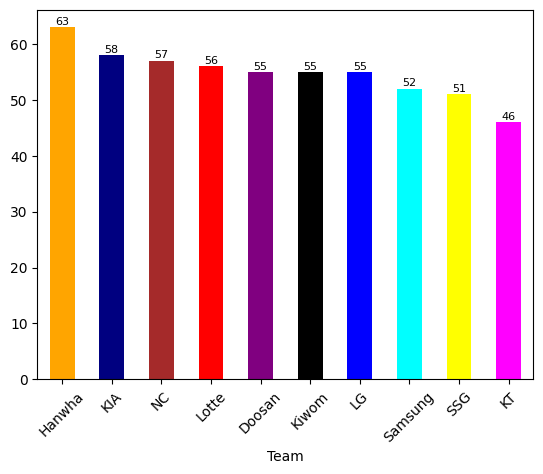

In [10]:
cp_count = cp_data.groupby('Team')
count = cp_count['PPF'].count().sort_values(ascending = False)
colors = ['orange', 'navy', 'brown', 'red', 'purple', 
          'black', 'blue', 'cyan', 'yellow', 'magenta']
ax = count.plot(kind = 'bar', color = colors[:len(count)])
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=8)
plt.xticks(rotation = 45)
plt.show()

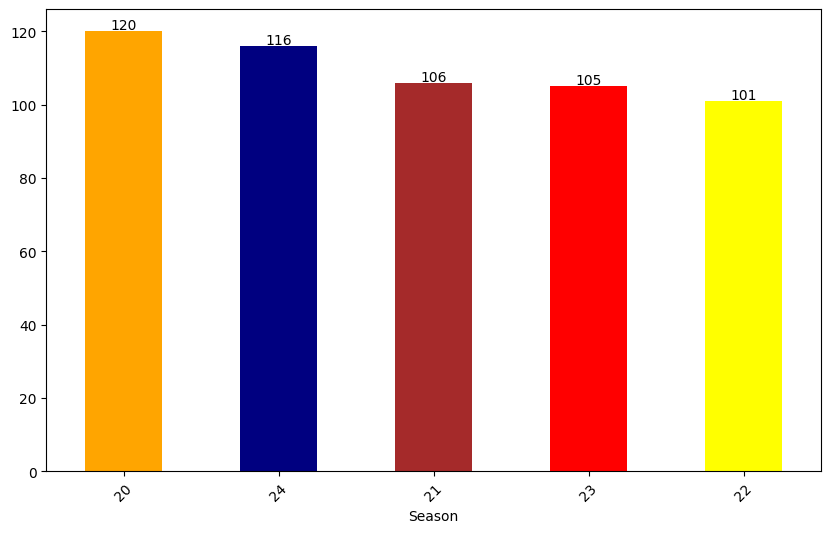

In [11]:
cp_count = cp_data.groupby('Season')
count = cp_count['PPF'].count().sort_values(ascending = False)
colors = ['orange', 'navy', 'brown', 'red', 'yellow']
plt.figure(figsize = (10,6))
ax = count.plot(kind = 'bar', color = colors[:len(count)])
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)
    
plt.xticks(rotation = 45)
plt.show()

In [54]:
name = cp_data['Name']
team = cp_data['Team']
season = cp_data['Season']
PF = cp_data['PPF']
cp_corr = cp_data.drop(columns = ['Name', 'Team', 'Season', 'PPF'], axis = 1)
cp_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 5 to 1464
Columns: 111 entries, War to ESPN
dtypes: float64(76), int64(35)
memory usage: 479.5 KB


In [55]:
corr_without_fip = cp_corr.drop(columns=['FIP']).corr()['ERA-'].abs().sort_values(ascending=False)

# 'ERA'로 시작하는 변수 제외
corr_without_fip = corr_without_fip[~corr_without_fip.index.str.contains('ERA')]
corr_without_war = corr_without_fip[~corr_without_fip.index.str.contains('war')]

# 상위 10개 변수 선택
top_20_features_era = corr_without_war.head(20)
print(top_20_features_era)

RA9       0.940389
rRA9-     0.896638
rRA9      0.891040
rRA9pf    0.890442
War       0.786899
WHIP      0.779915
OBP       0.751767
LOB       0.749085
SLG       0.731841
AVG       0.695855
FIP-      0.659758
SD        0.560072
G         0.556576
GR        0.548972
BABIP     0.523924
xFIP      0.517067
2time     0.512243
HR/9      0.506211
K-BB%     0.502061
P/IP      0.501399
Name: ERA-, dtype: float64


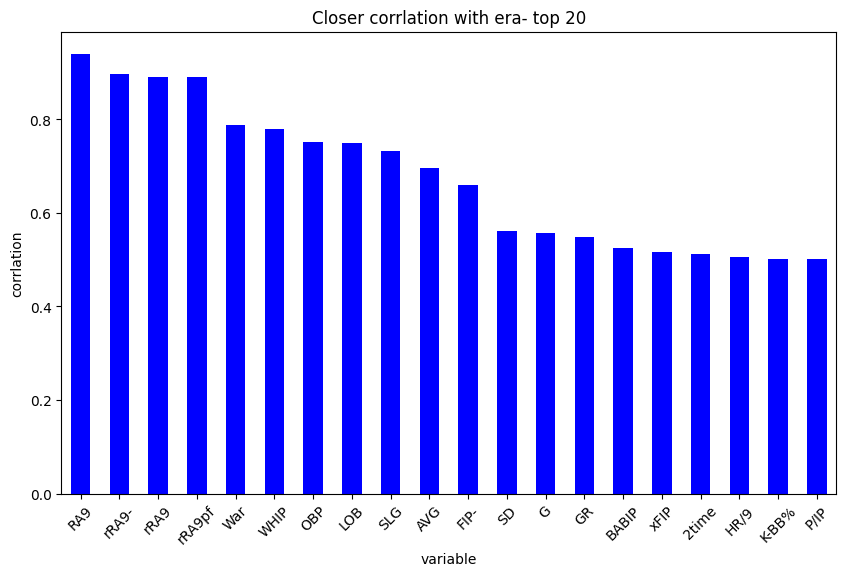

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
top_20_features_era.plot(kind = 'bar', color = 'blue')
plt.title('Closer corrlation with era- top 20')
plt.xlabel('variable')
plt.ylabel('corrlation')
plt.xticks(rotation = 45)
plt.show()

In [57]:
# 'ERA' 변수 제외한 상관계수 계산
corr_without_era = cp_corr.drop(columns=['ERA']).corr()['FIP-'].abs().sort_values(ascending=False)

# 'FIP' 및 'war'가 포함된 변수 제거
corr_filtered = corr_without_era[~corr_without_era.index.str.contains('FIP', case=False)]
corr_filtered = corr_filtered[~corr_filtered.index.str.contains('war', case=False)]

# 상위 20개 변수 선택
top_20_features_fip = corr_filtered.head(20)

# 결과 출력
print(top_20_features_fip)


kwERA     0.780265
K-BB%     0.770304
rRA9-     0.659995
ERA-      0.659758
HR/9      0.644915
rRA9pf    0.634937
rRA9      0.624131
K%        0.623630
RA9       0.616148
WHIP      0.608987
OBP       0.606877
SLG       0.580246
SO        0.544258
K/BB      0.525389
HR/FB%    0.523894
K/9       0.510032
SD        0.503336
G         0.497981
GR        0.491611
BB/9      0.468480
Name: FIP-, dtype: float64


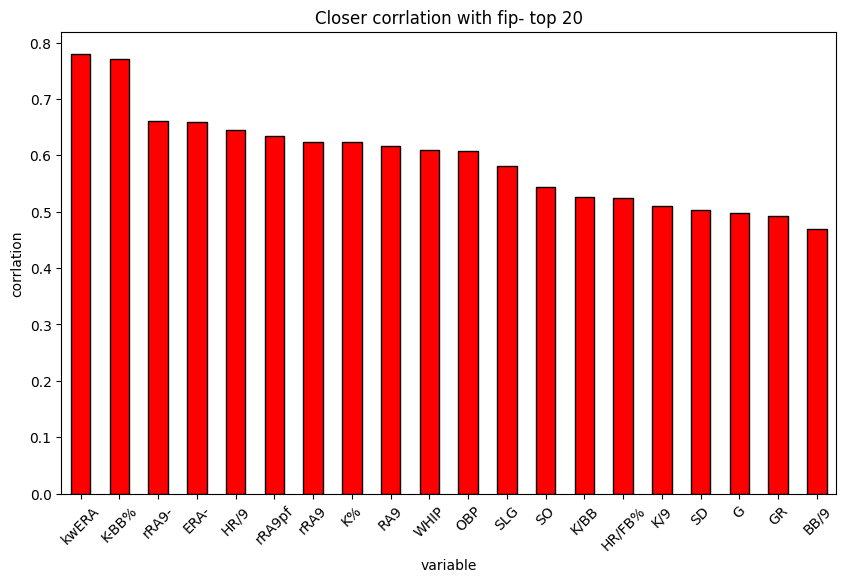

In [58]:
plt.figure(figsize = (10,6))
top_20_features_fip.plot(kind = 'bar', color = 'red', edgecolor = 'black')
plt.title('Closer corrlation with fip- top 20')
plt.xlabel('variable')
plt.ylabel('corrlation')
plt.xticks(rotation = 45)
plt.show()

In [59]:
from scipy.stats import pearsonr

# 'FIP' 변수와 다른 변수들 간의 상관계수 및 p-value 계산
results = []

for col in cp_corr.columns:
    if col != 'ERA' and not ('ERA' in col or 'war' in col or 'FIP' in col or 'War' in col or 'waa' in col):  # 'ERA'나 'war' 포함된 변수 제외
        corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr[col])
        results.append((col, abs(corr), p_value))  # 절댓값 상관계수 사용
        
# 데이터프레임 변환 및 정렬
corr_era_df = pd.DataFrame(results, columns=['Variable', 'Correlation', 'P_value'])
corr_era_df = corr_era_df[corr_era_df['Correlation'] >= 0.5].sort_values(by='Correlation', ascending=False)

# 결과 출력
print(corr_era_df)

C:\Users\user\AppData\Local\Temp\ipykernel_22156\2936881500.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr[col])


   Variable  Correlation        P_value
26      RA9     0.940389  6.561584e-258
39    rRA9-     0.896638  2.457372e-195
27     rRA9     0.891040  1.977296e-189
28   rRA9pf     0.890442  8.090022e-189
29     WHIP     0.779915  3.364006e-113
41      OBP     0.751767  8.358228e-101
38      LOB     0.749085   1.037730e-99
42      SLG     0.731841   5.392446e-93
40      AVG     0.695855   1.562652e-80
80       SD     0.560072   1.428687e-46
0         G     0.556576   6.760695e-46
2        GR     0.548972   1.867306e-44
37    BABIP     0.523924   5.840704e-40
67    2time     0.512243   5.465895e-38
33     HR/9     0.506211   5.322557e-37
36    K-BB%     0.502061   2.482236e-36
46     P/IP     0.501399   3.166872e-36


In [60]:
import pandas as pd
import statsmodels.api as sm

# AIC 계산 함수
def calculate_aic(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model.aic

# 'ERA'를 타겟 변수로 설정
y = cp_corr['ERA-']
candidate_features = corr_era_df['Variable'].tolist()  # 상관계수 높은 25개 변수

# 전체 변수로 모델 시작
selected_features = []  # 최종 선택된 변수 리스트
best_aic = float('inf')  # 현재 AIC 값 (최소화할 목표)

while True:
    improved = False
    remaining_features = list(set(candidate_features) - set(selected_features))

    # 1️⃣ **전진 선택 (Forward Selection)**
    aic_with_add = []
    for feature in remaining_features:
        temp_features = selected_features + [feature]
        X_temp = cp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_add.append((feature, temp_aic))

    if aic_with_add:
        min_aic_feature, min_aic = min(aic_with_add, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 추가
            best_aic = min_aic
            selected_features.append(min_aic_feature)
            improved = True

    # 2️⃣ **후진 제거 (Backward Elimination)**
    aic_with_remove = []
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = cp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_remove.append((feature, temp_aic))

    if aic_with_remove:
        min_aic_feature, min_aic = min(aic_with_remove, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 제거
            best_aic = min_aic
            selected_features.remove(min_aic_feature)
            improved = True

    if not improved:  # 더 이상 AIC 개선이 없으면 종료
        break

# 최적 변수 출력
print("Best AIC:", best_aic)
print("Best Feature Subset:", selected_features)

Best AIC: 4071.0545765191314
Best Feature Subset: ['RA9', 'rRA9-', 'rRA9pf', 'SLG', 'LOB']


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성(VIF) 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 최적 변수 조합으로 VIF 계산
X_best = cp_corr[list(selected_features)]  # 최적 변수 조합 선택
vif_df = calculate_vif(sm.add_constant(X_best))  # 상수항 포함하여 VIF 계산

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df)


### VIF (Variance Inflation Factor) ###
  Variable         VIF
0    const  420.332364
1      RA9   17.167180
2    rRA9-   17.762688
3   rRA9pf   33.367601
4      SLG    3.388701
5      LOB    4.339829


In [62]:
X_best = X_best.drop(columns = ['rRA9-', 'rRA9pf'])
vif_df_without_war = calculate_vif(sm.add_constant(X_best))

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_war)


### VIF (Variance Inflation Factor) ###
  Variable         VIF
0    const  391.180008
1      RA9    7.971598
2      SLG    3.238289
3      LOB    4.153812


In [63]:
cp_corr = pd.concat([cp_corr, name, team, season, PF], axis = 1)
cp_corr = cp_corr.loc[:, ~cp_corr.columns.duplicated()]

# 결과 확인
print(cp_corr)

       War   G  GS  GR  GF  CG  SHO  W  L   S  ...   FB%  LD%  GB/FB  HR/FB%  \
5     1.71  55   0  55  47   0    0  3  7  32  ...  57.6  1.7    0.7     2.9   
6     1.41  75   0  75   8   0    0  1  1   1  ...  43.3  3.0    1.2     5.2   
7     1.23  50   0  50   6   0    0  5  5   2  ...  51.6  1.6    0.9     3.1   
8     1.09  54   0  54   5   0    0  2  3   1  ...  50.0  3.0    0.9     4.8   
10    0.36  27   0  27  10   0    0  0  1   0  ...  42.7  2.4    1.3     5.7   
...    ...  ..  ..  ..  ..  ..  ... .. ..  ..  ...   ...  ...    ...     ...   
1447  0.70  40   8  32  10   0    0  0  5   1  ...  46.0  2.4    1.1     3.8   
1455 -0.02  45   0  45   9   0    0  1  2   0  ...  53.4  3.4    0.8     3.2   
1458 -0.06  46   0  46  11   0    0  1  3   0  ...  51.5  2.2    0.9     5.8   
1463 -0.29  21   7  14   5   0    0  3  2   0  ...  64.7  1.2    0.5     4.5   
1464 -0.36  38   3  35   5   0    0  1  3   0  ...  52.9  2.6    0.8     4.9   

      if1B%      ESPN  Name   Team  Sea

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 정의
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']
#cp_corr['PPF_neg'] = - cp_corr['PPF_inverse']
X = cp_corr[['RA9', 'SLG', 'LOB']]
y = cp_corr['ERA-']  # 종속 변수

# 데이터 나누기 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Lasso, Ridge는 가중치 크기에 영향을 받으므로 표준화가 필요함)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [65]:
cp_corr['PF_inverse']

5       1.001502
6       1.001502
7       1.001502
8       1.001502
10      1.001502
          ...   
1447    1.018019
1455    1.018019
1458    1.018019
1463    1.018019
1464    1.018019
Name: PF_inverse, Length: 548, dtype: float64

In [66]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 입력 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. RidgeCV 학습 (표준화된 데이터 사용)
alphas = np.logspace(-4, 2, 50)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_std, y_train)

# 3. 최적 alpha 출력
best_alpha = ridge_cv.alpha_
print(f'Best alpha: {best_alpha}')

# 4. 최적 alpha로 Ridge 재학습
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_std, y_train)

# 5. 예측 및 MSE 평가
y_pred_ridge = ridge_best.predict(X_test_std)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Optimized Ridge MSE: {mse_ridge}')

# 6. 표준화 회귀계수 출력
ridge_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': ridge_best.coef_
})
print("\n### Ridge 표준화 회귀 계수 ###")
print(ridge_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['Predicted_Ridge_ERA'] = ridge_best.predict(X_all_std)
cp_corr['New_ridge_ERA'] = cp_corr['Predicted_Ridge_ERA'] * cp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_ridge_ERA'] = (
    (cp_corr['New_ridge_ERA'] - cp_corr['New_ridge_ERA'].min()) /
    (cp_corr['New_ridge_ERA'].max() - cp_corr['New_ridge_ERA'].min())
)

Best alpha: 0.15264179671752334
Optimized Ridge MSE: 163.08110824725256

### Ridge 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 34.192803
1      SLG                  2.337975
2      LOB                 -0.122901


C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [67]:
# 결과 확인
print("\n### 선수별 예측 ERA ###")
print(cp_corr[['Name', 'Team', 'Season', 'ERA-', 'New_ridge_ERA', 'Normalized_New_ridge_ERA']])  # 예시 출력


### 선수별 예측 ERA ###
     Name   Team  Season    ERA-  New_ridge_ERA  Normalized_New_ridge_ERA
5     정해영    KIA      22   83.82      70.577153                  0.173605
6     이준영    KIA      22   72.36      68.398767                  0.164000
7     전상현    KIA      22   82.01      79.015137                  0.210809
8     장현식    KIA      22   77.37      73.060845                  0.184556
10    고영창    KIA      22   46.57      43.786986                  0.055485
...   ...    ...     ...     ...            ...                       ...
1447  김동혁  Kiwom      21  116.59     113.970250                  0.364930
1455   양현  Kiwom      21  108.24     118.132405                  0.383281
1458  김성진  Kiwom      21  119.71     130.586872                  0.438194
1463  김선기  Kiwom      21  150.50     141.575928                  0.486646
1464  이승호  Kiwom      21  127.33     147.504980                  0.512788

[548 rows x 6 columns]


In [68]:
from sklearn.linear_model import LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ----------------------------
# 2. Lasso 모델 학습 (표준화 후)
# ----------------------------
alphas = np.logspace(-4, 2, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_std, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f'Lasso Best alpha: {best_alpha_lasso}')

lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_std, y_train)

y_pred_lasso = lasso_best.predict(X_test_std)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {mse_lasso}')

lasso_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': lasso_best.coef_
})
print("\n### Lasso 표준화 회귀 계수 ###")
print(lasso_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['lasso_Predicted_ERA'] = lasso_best.predict(X_all_std)
cp_corr['New_Lasso_ERA'] = cp_corr['lasso_Predicted_ERA'] * cp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_Lasso_ERA'] = (
    (cp_corr['New_Lasso_ERA'] - cp_corr['New_Lasso_ERA'].min()) /
    (cp_corr['New_Lasso_ERA'].max() - cp_corr['New_Lasso_ERA'].min())
)

t_value = np.sum(np.abs(lasso_best.coef_))
print(f"t (L1-norm of coefficients): {t_value}")

Lasso Best alpha: 0.35564803062231287
Lasso MSE: 162.45492399244566

### Lasso 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 34.162970
1      SLG                  2.055082
2      LOB                 -0.000000
t (L1-norm of coefficients): 36.218051711176784


In [69]:
# 결과 확인
print("\n### 선수별 예측 ERA ###")
print(cp_corr[['Name', 'Team', 'Season', 'ERA',  'ERA-', 'lasso_Predicted_ERA', 'Normalized_New_Lasso_ERA']])  # 예시 출력


### 선수별 예측 ERA ###
     Name   Team  Season   ERA    ERA-  lasso_Predicted_ERA  \
5     정해영    KIA      22  3.38   83.82            70.738628   
6     이준영    KIA      22  2.91   72.36            68.711490   
7     전상현    KIA      22  3.30   82.01            79.148680   
8     장현식    KIA      22  3.12   77.37            73.174480   
10    고영창    KIA      22  1.88   46.57            44.231243   
...   ...    ...     ...   ...     ...                  ...   
1447  김동혁  Kiwom      21  5.05  116.59           111.888470   
1455   양현  Kiwom      21  4.69  108.24           115.948443   
1458  김성진  Kiwom      21  5.18  119.71           128.030742   
1463  김선기  Kiwom      21  6.52  150.50           138.827835   
1464  이승호  Kiwom      21  5.51  127.33           144.690741   

      Normalized_New_Lasso_ERA  
5                     0.173315  
6                     0.164273  
7                     0.210829  
8                     0.184181  
10                    0.055076  
...                      

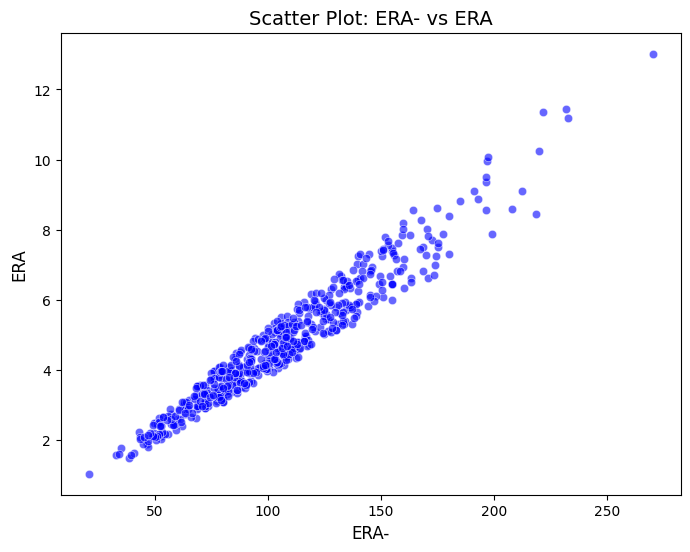


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9700448112768587
P-value: 0.0
상관계수는 통계적으로 유의미합니다.


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='ERA-', y='ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr['ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


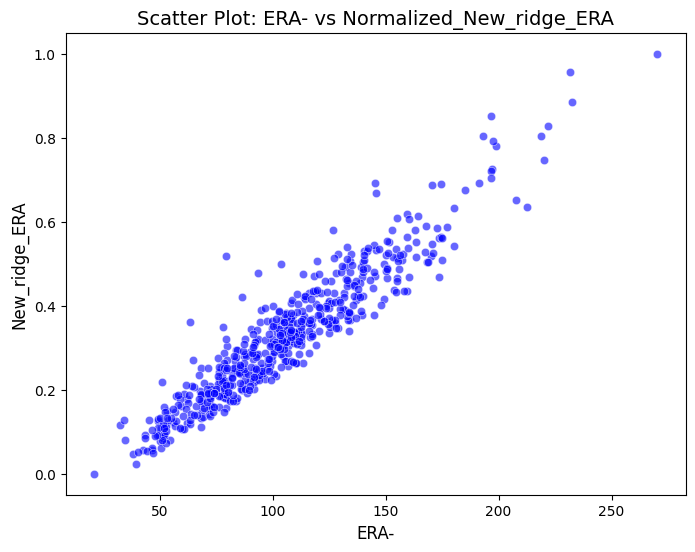


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9426893759987864
P-value: 1.9542861662260413e-262
상관계수는 통계적으로 유의미합니다.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='ERA-', y='Normalized_New_ridge_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_ridge_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('New_ridge_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr['Normalized_New_ridge_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


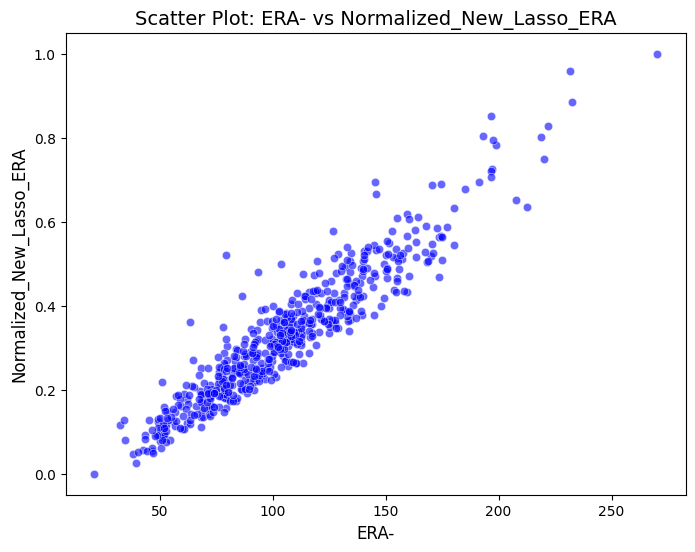


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9425957938891004
P-value: 3.011351388335192e-262
상관계수는 통계적으로 유의미합니다.


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='ERA-', y='Normalized_New_Lasso_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_Lasso_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('Normalized_New_Lasso_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr['Normalized_New_Lasso_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [73]:
l1_ratios = np.linspace(0.1, 1, 10)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv.fit(X_train_std, y_train)

best_alpha_elastic = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f'ElasticNet Best alpha: {best_alpha_elastic}')
print(f'ElasticNet Best l1_ratio: {best_l1_ratio}')

elastic_best = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio)
elastic_best.fit(X_train_std, y_train)

y_pred_elastic = elastic_best.predict(X_test_std)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f'ElasticNet MSE: {mse_elastic}')

elastic_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': elastic_best.coef_
})
print("\n### ElasticNet 표준화 회귀 계수 ###")
print(elastic_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['Predicted_Elastic_ERA'] = elastic_best.predict(X_all_std)
cp_corr['New_Elastic_ERA'] = cp_corr['Predicted_Elastic_ERA'] * cp_corr['PF_inverse']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_Elastic_ERA'] = (
    (cp_corr['New_Elastic_ERA'] - cp_corr['New_Elastic_ERA'].min()) /
    (cp_corr['New_Elastic_ERA'].max() - cp_corr['New_Elastic_ERA'].min())
)

ElasticNet Best alpha: 0.35564803062231287
ElasticNet Best l1_ratio: 1.0
ElasticNet MSE: 162.45492399244566

### ElasticNet 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0      RA9                 34.162970
1      SLG                  2.055082
2      LOB                 -0.000000


In [74]:
# Name 변수를 다시 sp_corr에 추가
#cp_corr = pd.concat([name, team, season, cp_corr], axis=1)

# 결과 확인
#print("\n### 선수별 예측 ERA ###")
#print(cp_corr[['Name', 'Team', 'Season', 'ERA', 'Predicted_ERA']])  # 예시 출력
# Name 변수를 다시 sp_corr에 추가
#cp_corr = pd.concat([name, cp_corr], axis=1)

# 결과 확인
print("\n### 정규화된 ElasticNet ERA ###")
print(cp_corr[['Name', 'Team', 'Season', 'ERA-', 'Predicted_Elastic_ERA', 'New_Elastic_ERA', 'Normalized_New_Elastic_ERA']])


### 정규화된 ElasticNet ERA ###
     Name   Team  Season    ERA-  Predicted_Elastic_ERA  New_Elastic_ERA  \
5     정해영    KIA      22   83.82              70.738628        70.844896   
6     이준영    KIA      22   72.36              68.711490        68.814712   
7     전상현    KIA      22   82.01              79.148680        79.267582   
8     장현식    KIA      22   77.37              73.174480        73.284407   
10    고영창    KIA      22   46.57              44.231243        44.297690   
...   ...    ...     ...     ...                    ...              ...   
1447  김동혁  Kiwom      21  116.59             111.888470       113.904581   
1455   양현  Kiwom      21  108.24             115.948443       118.037710   
1458  김성진  Kiwom      21  119.71             128.030742       130.337719   
1463  김선기  Kiwom      21  150.50             138.827835       141.329364   
1464  이승호  Kiwom      21  127.33             144.690741       147.297915   

      Normalized_New_Elastic_ERA  
5                      

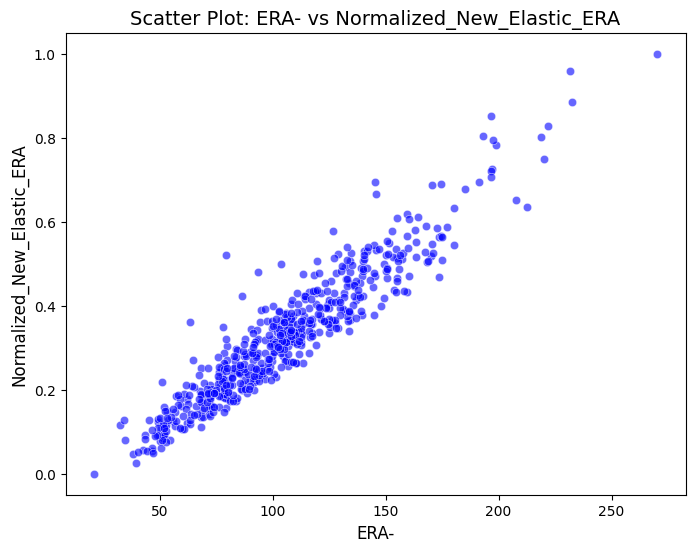


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9425957938891004
P-value: 3.011351388335192e-262
상관계수는 통계적으로 유의미합니다.


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='ERA-', y='Normalized_New_Elastic_ERA', color='blue', alpha=0.6)
plt.title('Scatter Plot: ERA- vs Normalized_New_Elastic_ERA', fontsize=14)
plt.xlabel('ERA-', fontsize=12)
plt.ylabel('Normalized_New_Elastic_ERA', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['ERA-'], cp_corr['Normalized_New_Elastic_ERA'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['RA9', 'SLG', 'LOB']]
y = cp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 5. XGBoost 하이퍼파라미터 설정
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],  # 학습률
#     'max_depth': [5,7,8,10],  # 트리의 최대 깊이
#     'n_estimators': [800, 1000, 1200],  # 부스팅 반복 횟수
#     'colsample_bytree': [0.5, 1, 2],  # 트리 생성 시 열 샘플링 비율
#     'alpha': [0, 0.1, 0.5],  # L1 정규화 파라미터
#     'subsample': [0.1, 0.15, 0.2],  # 각 부스팅 반복 시 사용되는 데이터 샘플링 비율
#     'lambda': [0, 0.1, 1],  # L2 정규화 파라미터
#     'scale_pos_weight': [0.05, 0.1, 0.3]  # 불균형 데이터셋에서 양성 클래스에 대한 가중치 조정
# }
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'max_depth': [7,8,10],  # 트리의 최대 깊이
    'n_estimators': [800, 1000, 1200],  # 부스팅 반복 횟수
    'colsample_bytree': [0.5, 1, 2],  # 트리 생성 시 열 샘플링 비율
    'alpha': [0, 0.1, 0.5],  # L1 정규화 파라미터
    'subsample': [0.5,0.8,1],  # 각 부스팅 반복 시 사용되는 데이터 샘플링 비율
    'lambda': [0, 0.1, 1],  # L2 정규화 파라미터
    'scale_pos_weight': [0.05, 0.1, 0.3]  # 불균형 데이터셋에서 양성 클래스에 대한 가중치 조정
}
# 6. XGBoost 모델 및 GridSearchCV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 7. 최적 모델 추출 및 예측
best_xg_reg = grid_search.best_estimator_
y_pred_xg = best_xg_reg.predict(X_test_scaled)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best XGBoost MSE: {mse_xg:.4f}")

# 8. 전체 데이터에 대한 예측 및 PF 반영
cp_corr['Predicted_ERA_XGBoost'] = best_xg_reg.predict(X_scaled_all)
cp_corr['New_xgboost_ERA'] = cp_corr['Predicted_ERA_XGBoost'] * cp_corr['PF_inverse']

# 9. 결과 출력
print("\n### 최적 XGBoost 예측 ERA ###")
print(cp_corr[['Name', 'ERA-', 'Predicted_ERA_XGBoost', 'New_xgboost_ERA']])

cp_corr['Normalized_New_xgboost_ERA'] = (
    (cp_corr['New_xgboost_ERA'] - cp_corr['New_xgboost_ERA'].min()) /
    (cp_corr['New_xgboost_ERA'].max() - cp_corr['New_xgboost_ERA'].min())
)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits


C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10935 fits failed out of a total of 32805.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10935 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\.conda\envs\clean_env\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\user\.conda\envs\clean_env\lib\site-packages\xgboost\sklearn.py", line 1170, in fit
    self._Booster = train(
  File "C:\Users\user\.c

Best Hyperparameters: {'alpha': 0, 'colsample_bytree': 1, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 800, 'scale_pos_weight': 0.05, 'subsample': 0.5}
Best XGBoost MSE: 193.9499

### 최적 XGBoost 예측 ERA ###
     Name    ERA-  Predicted_ERA_XGBoost  New_xgboost_ERA
5     정해영   83.82              71.012108        71.118786
6     이준영   72.36              71.052216        71.158954
7     전상현   82.01              85.282875        85.410992
8     장현식   77.37              74.787560        74.899909
10    고영창   46.57              42.516594        42.580465
...   ...     ...                    ...              ...
1447  김동혁  116.59             124.191658       126.429459
1455   양현  108.24             112.113274       114.133435
1458  김성진  119.71             121.865685       124.061574
1463  김선기  150.50             140.386993       142.916618
1464  이승호  127.33             132.164230       134.545689

[548 rows x 4 columns]


In [104]:
print("\n### 정규화된 XGBoost ERA ###")
print(cp_corr[['Name', 'ERA-', 'Predicted_ERA_XGBoost', 'New_xgboost_ERA', 'Normalized_New_xgboost_ERA']])


### 정규화된 XGBoost ERA ###
     Name    ERA-  Predicted_ERA_XGBoost  New_xgboost_ERA  \
5     정해영   83.82              71.012108        71.118786   
6     이준영   72.36              71.052216        71.158954   
7     전상현   82.01              85.282875        85.410992   
8     장현식   77.37              74.787560        74.899909   
10    고영창   46.57              42.516594        42.580465   
...   ...     ...                    ...              ...   
1447  김동혁  116.59             124.191658       126.429459   
1455   양현  108.24             112.113274       114.133435   
1458  김성진  119.71             121.865685       124.061574   
1463  김선기  150.50             140.386993       142.916618   
1464  이승호  127.33             132.164230       134.545689   

      Normalized_New_xgboost_ERA  
5                       0.192951  
6                       0.193128  
7                       0.255790  
8                       0.209576  
10                      0.067477  
...                          ..

In [105]:
ser = pd.Series(best_xg_reg.feature_importances_, index = X.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

RA9    0.827955
LOB    0.086656
SLG    0.085388
dtype: float32


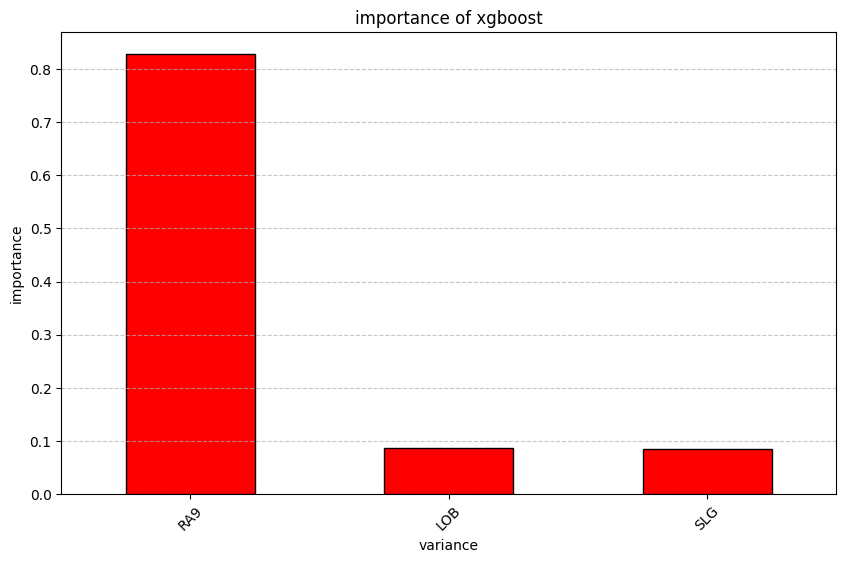

In [106]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'red', edgecolor = 'black')

plt.title('importance of xgboost')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

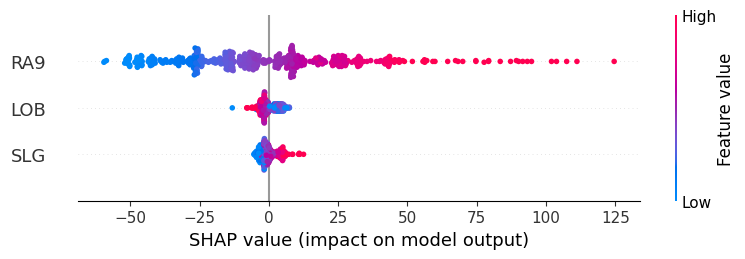

In [80]:
import shap 
# TreeExplainer로 XGBoost 모델 해석 
explainer = shap.Explainer(best_xg_reg) 
shap_values = explainer(X_scaled_all) 
# 전체 변수 영향력 요약 + 방향성 
shap.summary_plot(shap_values, X, feature_names=X.columns)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math


# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['RA9', 'SLG', 'LOB']]
y = cp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

params = {
    'n_estimators': (100, 250, 500, 750, 1000),
    'max_depth': (3, 6, 9, 12, 15),
    'min_samples_leaf': (5, 10, 15, 20, 25),
    'min_samples_split': (5, 10, 15, 20, 25)
}
# params = {
#     'n_estimators' : (100, 200, 500),
#     'max_depth' : (5,8,10),
#     'min_samples_leaf' : (8,18,25),
#     'min_samples_split' : (8,16,25)
# }

# RandomForest 모델 학습
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg_cv = GridSearchCV(rf_reg, param_grid = params, cv = 2, n_jobs = -1)
rf_reg_cv.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg_cv.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForest MSE: {mse_rf}')

# 예측값 생성 (전체 데이터에 대해 예측)
cp_corr['Predicted_ERA_RF'] = rf_reg_cv.predict(X)
cp_corr['New_randomforest_ERA'] = cp_corr['Predicted_ERA_RF'] * cp_corr['PF_inverse']
# 결과 확인
print("\n### RandomForest 예측 ERA ###")
print(cp_corr[['Name', 'ERA-', 'Predicted_ERA_RF', 'New_randomforest_ERA']])

cp_corr['Normalized_New_randomforest_ERA'] = (
    (cp_corr['New_randomforest_ERA'] - cp_corr['New_randomforest_ERA'].min()) /
    (cp_corr['New_randomforest_ERA'].max() - cp_corr['New_randomforest_ERA'].min())
)

RandomForest MSE: 189.82881731724657

### RandomForest 예측 ERA ###
     Name    ERA-  Predicted_ERA_RF  New_randomforest_ERA
5     정해영   83.82         70.882807             70.989291
6     이준영   72.36         70.474480             70.580351
7     전상현   82.01         78.401166             78.518944
8     장현식   77.37         74.132151             74.243516
10    고영창   46.57         44.856408             44.923794
...   ...     ...               ...                   ...
1447  김동혁  116.59        116.857394            118.963040
1455   양현  108.24        118.320183            120.452187
1458  김성진  119.71        128.794953            131.115701
1463  김선기  150.50        133.231013            135.631694
1464  이승호  127.33        137.401250            139.877075

[548 rows x 4 columns]


In [40]:
print("\n### 정규화된 RandomForest ERA ###")
print(cp_corr[['Name', 'ERA-', 'Predicted_ERA_RF', 'New_randomforest_ERA', 'Normalized_New_randomforest_ERA']])


### 정규화된 RandomForest ERA ###
     Name    ERA-  Predicted_ERA_RF  New_randomforest_ERA  \
5     정해영   83.82         70.882807             70.989291   
6     이준영   72.36         70.474480             70.580351   
7     전상현   82.01         78.401166             78.518944   
8     장현식   77.37         74.132151             74.243516   
10    고영창   46.57         44.856408             44.923794   
...   ...     ...               ...                   ...   
1447  김동혁  116.59        116.857394            118.963040   
1455   양현  108.24        118.320183            120.452187   
1458  김성진  119.71        128.794953            131.115701   
1463  김선기  150.50        133.231013            135.631694   
1464  이승호  127.33        137.401250            139.877075   

      Normalized_New_randomforest_ERA  
5                            0.159121  
6                            0.156909  
7                            0.199850  
8                            0.176724  
10                           0.01813

In [41]:
best_rf = rf_reg_cv.best_estimator_
print(best_rf.feature_importances_, '\n')
ser = pd.Series(best_rf.feature_importances_, index = X_train.columns)

top3 = ser.sort_values(ascending = False)[:4]
print(top3)

[0.97806852 0.01255879 0.00937269] 

RA9    0.978069
SLG    0.012559
LOB    0.009373
dtype: float64


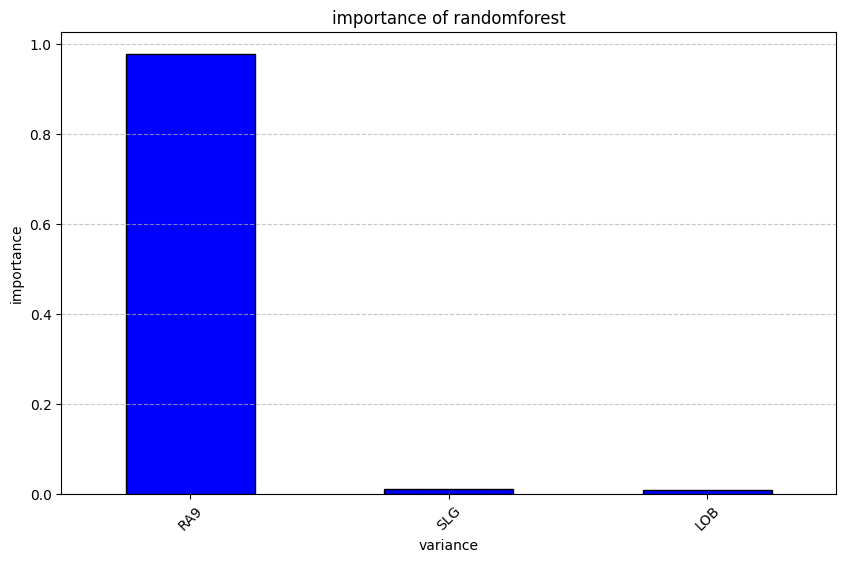

In [42]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'blue', edgecolor = 'black')

plt.title('importance of randomforest')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [43]:
!pip install lightgbm

In [44]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

lgb_reg = lgb.LGBMRegressor()

# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['RA9', 'SLG', 'LOB']]
y = cp_corr['ERA-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [15, 20, 25],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'n_estimators': [500, 700, 1000, 1200]
}

# GridSearchCV를 사용한 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(lgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델 가져오기
best_lgb = grid_search.best_estimator_

# 예측 및 평가
y_pred_lgb = best_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)

# 결과 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'LightGBM MSE: {mse_lgb}')

# Feature Importance 확인
feature_importance = pd.Series(best_lgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# 상위 10개 변수 출력
print("\n### Top 5 Feature Importance ###")
print(feature_importance[:5]) 

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 3
[LightGBM] [Info] Start training from score 107.176941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [48]:
cp_corr['Predicted_ERA_gbm'] = best_lgb.predict(X)
cp_corr['New_lightgbm_ERA'] = cp_corr['Predicted_ERA_gbm'] * cp_corr['PF_inverse']

cp_corr['Normalized_New_LightGBM_ERA'] = (
    (cp_corr['New_lightgbm_ERA'] - cp_corr['New_lightgbm_ERA'].min()) /
    (cp_corr['New_lightgbm_ERA'].max() - cp_corr['New_lightgbm_ERA'].min())
)

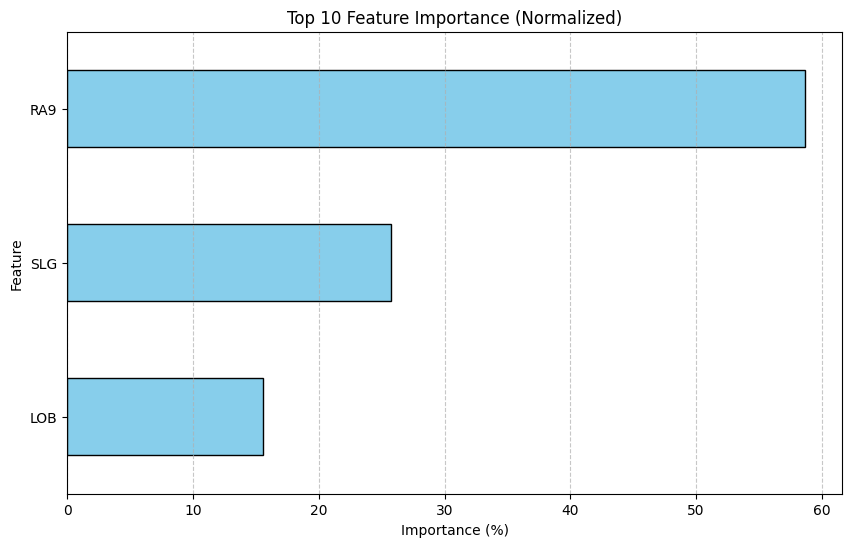

In [49]:
import matplotlib.pyplot as plt

# Feature Importance 비율화 (백분율)
feature_importance_ratio = feature_importance / feature_importance.sum() * 100

# 상위 10개 변수 선택
top_10_features = feature_importance_ratio[:10]

# 시각화
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance (Normalized)")
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 정렬
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [50]:
# 결과 확인
print("\n### LightGBM 예측 ERA ###")
print(cp_corr[['Name', 'ERA-', 'Predicted_ERA_gbm', 'New_lightgbm_ERA', 'Normalized_New_LightGBM_ERA']])


### LightGBM 예측 ERA ###
     Name    ERA-  Predicted_ERA_gbm  New_lightgbm_ERA  \
5     정해영   83.82          71.131063         71.237920   
6     이준영   72.36          71.324332         71.431479   
7     전상현   82.01          79.022849         79.141561   
8     장현식   77.37          71.514764         71.622197   
10    고영창   46.57          50.431883         50.507645   
...   ...     ...                ...               ...   
1447  김동혁  116.59         117.421273        119.537079   
1455   양현  108.24         117.641405        119.761178   
1458  김성진  119.71         127.445630        129.742065   
1463  김선기  150.50         130.638961        132.992936   
1464  이승호  127.33         136.776031        139.240589   

      Normalized_New_LightGBM_ERA  
5                        0.146982  
6                        0.148080  
7                        0.191847  
8                        0.149163  
10                       0.029305  
...                           ...  
1447                     0

In [76]:
cp_corr.to_csv("Predict_relief_PPF_newsample_eraplus3.csv", index = False, encoding = "utf-8-sig")
print("done")

done


In [110]:
cp_corr.to_csv("Predict_relief_PPF_newsample_eraplus4.csv", index = False, encoding = "utf-8-sig")
print("done")

done


In [107]:
#another_cp_corr = cp_corr[['ERA-', 'ERA', 'Normalized_New_ridge_ERA', 'Normalized_New_Lasso_ERA', 'Normalized_New_Elastic_ERA', 'Normalized_New_xgboost_ERA','Normalized_New_randomforest_ERA', 'Normalized_New_LightGBM_ERA']]
another_cp_corr = cp_corr[['ERA-', 'ERA', 'Normalized_New_ridge_ERA', 'Normalized_New_Lasso_ERA', 'Normalized_New_Elastic_ERA', 'Normalized_New_xgboost_ERA']]
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(another_cp_corr)

# 표준화된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=another_cp_corr.columns)


In [98]:
scaled_df

,ERA-,ERA,Normalized_New_ridge_ERA,Normalized_New_Lasso_ERA,Normalized_New_Elastic_ERA,Normalized_New_xgboost_ERA
0,-0.584968,-0.790950,-0.991779,-0.994248,-0.994248,-0.993730
1,-0.893050,-1.059912,-1.053164,-1.052013,-1.052013,-0.975767
2,-0.633626,-0.836731,-0.754003,-0.754598,-0.754598,-0.703611
3,-0.758365,-0.939738,-0.921790,-0.924837,-0.924837,-0.892930
4,-1.586368,-1.649340,-1.746704,-1.749593,-1.749593,-1.730180
...,...,...,...,...,...,...
543,0.295996,0.164723,0.231005,0.230925,0.230925,0.555088
544,0.071521,-0.041290,0.348291,0.348524,0.348524,0.255704
545,0.379871,0.239117,0.699248,0.698495,0.698495,0.539191
546,1.207606,1.005945,1.008911,1.011240,1.011240,0.879026


In [84]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9700448112768586
P-value: 0.0
RMSE: 0.24476596464027206


In [85]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9400896225537171


In [86]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9426893759987865
P-value: 1.9542861662260413e-262
RMSE: 0.3385575992389291


In [87]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_ridge_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8853787519975727


In [88]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9425957938891003
P-value: 3.011351388338229e-262
RMSE: 0.3388339006383503


In [89]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_Lasso_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8851915877782006


In [90]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9425957938891003
P-value: 3.011351388338229e-262
RMSE: 0.3388339006383503


In [91]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_Elastic_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8851915877782006


In [108]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9739597233049326
P-value: 0.0
RMSE: 0.22821164166215221


In [109]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_xgboost_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.9479194466098654


In [63]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9481781260757477
P-value: 4.862626541326141e-274
RMSE: 0.32193749059173693


In [64]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_randomforest_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8963562521514953


In [65]:
corr, p_value = pearsonr(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9417577563666497
P-value: 1.4007265513885476e-260
RMSE: 0.3412982380070258


In [66]:
from sklearn.metrics import r2_score

# R² 계산
r2 = r2_score(scaled_df['ERA-'], scaled_df['Normalized_New_LightGBM_ERA'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8835155127332995


In [142]:
name = cp_data['Name']
team = cp_data['Team']
season = cp_data['Season']
PF = cp_data['PPF']
cp_corr = cp_data.drop(columns = ['Name', 'Team', 'Season', 'PPF'], axis = 1)
cp_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 5 to 1464
Columns: 111 entries, War to ESPN
dtypes: float64(76), int64(35)
memory usage: 479.5 KB


In [143]:
from scipy.stats import pearsonr

# 'ERA' 변수와 다른 변수들 간의 상관계수 및 p-value 계산
results = []

for col in cp_corr.columns:
    if col != 'FIP' and not ('ERA' in col or 'war' in col or 'FIP' in col or 'War' in col or 'waa' in col):  # 'ERA'로 시작하거나 포함된 변수 제외
        corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr[col])
        results.append((col, abs(corr), p_value))  # 절댓값 상관계수 사용
        
# 데이터프레임 변환 및 정렬
corr_fip_df = pd.DataFrame(results, columns=['Variable', 'Correlation', 'P_value'])
corr_fip_df = corr_fip_df[corr_fip_df['Correlation'] >= 0.5].sort_values(by='Correlation', ascending=False)

# 결과 출력
print(corr_fip_df)

   Variable  Correlation        P_value
36    K-BB%     0.770304  9.078600e-109
39    rRA9-     0.659995   7.892504e-70
33     HR/9     0.644915   9.340094e-66
28   rRA9pf     0.634937   3.477938e-63
27     rRA9     0.624131   1.663582e-60
34       K%     0.623630   2.202305e-60
26      RA9     0.616148   1.362288e-58
29     WHIP     0.608987   6.370992e-57
41      OBP     0.606877   1.942238e-56
42      SLG     0.580246   1.251196e-50
22       SO     0.544258   1.400424e-43
32     K/BB     0.525389   3.263891e-40
97   HR/FB%     0.523894   5.909403e-40
30      K/9     0.510032   1.265550e-37
80       SD     0.503336   1.550063e-36


C:\Users\user\AppData\Local\Temp\ipykernel_22156\969826821.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr[col])


In [144]:
import pandas as pd
import statsmodels.api as sm

# AIC 계산 함수
def calculate_aic(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model.aic

# 'ERA'를 타겟 변수로 설정
y = cp_corr['FIP-']
candidate_features = corr_fip_df['Variable'].tolist()  # 상관계수 높은 25개 변수

# 전체 변수로 모델 시작
selected_features = []  # 최종 선택된 변수 리스트
best_aic = float('inf')  # 현재 AIC 값 (최소화할 목표)

while True:
    improved = False
    remaining_features = list(set(candidate_features) - set(selected_features))

    # 1️⃣ **전진 선택 (Forward Selection)**
    aic_with_add = []
    for feature in remaining_features:
        temp_features = selected_features + [feature]
        X_temp = cp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_add.append((feature, temp_aic))

    if aic_with_add:
        min_aic_feature, min_aic = min(aic_with_add, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 추가
            best_aic = min_aic
            selected_features.append(min_aic_feature)
            improved = True

    # 2️⃣ **후진 제거 (Backward Elimination)**
    aic_with_remove = []
    for feature in selected_features:
        temp_features = selected_features.copy()
        temp_features.remove(feature)
        X_temp = cp_corr[temp_features]
        temp_aic = calculate_aic(X_temp, y)
        aic_with_remove.append((feature, temp_aic))

    if aic_with_remove:
        min_aic_feature, min_aic = min(aic_with_remove, key=lambda x: x[1])
        if min_aic < best_aic:  # AIC 감소하면 제거
            best_aic = min_aic
            selected_features.remove(min_aic_feature)
            improved = True

    if not improved:  # 더 이상 AIC 개선이 없으면 종료
        break

# 최적 변수 출력
print("Best AIC:", best_aic)
print("Best Feature Subset:", selected_features)

Best AIC: 3457.8267401267194
Best Feature Subset: ['K-BB%', 'HR/9', 'SLG', 'rRA9-', 'rRA9', 'OBP', 'K%', 'rRA9pf', 'HR/FB%', 'K/BB', 'WHIP']


In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성(VIF) 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 최적 변수 조합으로 VIF 계산
X_best = cp_corr[list(selected_features)]  # 최적 변수 조합 선택
vif_df = calculate_vif(sm.add_constant(X_best))  # 상수항 포함하여 VIF 계산

# VIF 출력
print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df)


### VIF (Variance Inflation Factor) ###
   Variable         VIF
0     const  244.903862
1     K-BB%   11.785312
2      HR/9   14.261948
3       SLG   11.167113
4     rRA9-   21.443762
5      rRA9   77.175913
6       OBP   19.552499
7        K%    7.150183
8    rRA9pf  125.955162
9    HR/FB%    9.218608
10     K/BB    2.202054
11     WHIP   18.805867


In [146]:
X_best = X_best.drop(columns = ['K-BB%', 'rRA9pf', 'rRA9-', 'rRA9'])
vif_df_without_variance = calculate_vif(sm.add_constant(X_best))

print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_variance)


### VIF (Variance Inflation Factor) ###
  Variable         VIF
0    const  235.494749
1     HR/9   13.302734
2      SLG    6.564954
3      OBP   17.676118
4       K%    1.767047
5   HR/FB%    9.170296
6     K/BB    1.738513
7     WHIP   15.566950


In [147]:
X_best = X_best.drop(columns = ['HR/FB%', 'WHIP'])
vif_df_without_variance = calculate_vif(sm.add_constant(X_best))

print("\n### VIF (Variance Inflation Factor) ###")
print(vif_df_without_variance)


### VIF (Variance Inflation Factor) ###
  Variable         VIF
0    const  143.961350
1     HR/9    3.444450
2      SLG    6.493917
3      OBP    3.296281
4       K%    1.514442
5     K/BB    1.722453


In [148]:
# X_best = X_best.drop(columns = ['SLG'])
# vif_df_without_variance = calculate_vif(sm.add_constant(X_best))

# print("\n### VIF (Variance Inflation Factor) ###")
# print(vif_df_without_variance)

In [149]:
#cp_corr = pd.concat([cp_corr, PPF], axis = 1)
cp_corr = pd.concat([cp_corr, team, name, season, PF], axis = 1)
cp_corr = cp_corr.loc[:, ~cp_corr.columns.duplicated()]

# 결과 확인
print(cp_corr)

       War   G  GS  GR  GF  CG  SHO  W  L   S  ...   FB%  LD%  GB/FB  HR/FB%  \
5     1.71  55   0  55  47   0    0  3  7  32  ...  57.6  1.7    0.7     2.9   
6     1.41  75   0  75   8   0    0  1  1   1  ...  43.3  3.0    1.2     5.2   
7     1.23  50   0  50   6   0    0  5  5   2  ...  51.6  1.6    0.9     3.1   
8     1.09  54   0  54   5   0    0  2  3   1  ...  50.0  3.0    0.9     4.8   
10    0.36  27   0  27  10   0    0  0  1   0  ...  42.7  2.4    1.3     5.7   
...    ...  ..  ..  ..  ..  ..  ... .. ..  ..  ...   ...  ...    ...     ...   
1447  0.70  40   8  32  10   0    0  0  5   1  ...  46.0  2.4    1.1     3.8   
1455 -0.02  45   0  45   9   0    0  1  2   0  ...  53.4  3.4    0.8     3.2   
1458 -0.06  46   0  46  11   0    0  1  3   0  ...  51.5  2.2    0.9     5.8   
1463 -0.29  21   7  14   5   0    0  3  2   0  ...  64.7  1.2    0.5     4.5   
1464 -0.36  38   3  35   5   0    0  1  3   0  ...  52.9  2.6    0.8     4.9   

      if1B%      ESPN   Team  Name  Sea

In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 정의
cp_corr['inver_PF'] = 1 / cp_corr['PPF']
X = cp_corr[['HR/9', 'OBP', 'K%', 'SLG', 'K/BB']]
y = cp_corr['FIP-']  # 종속 변수

# 데이터 나누기 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화 (Lasso, Ridge는 가중치 크기에 영향을 받으므로 표준화가 필요함)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [151]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 입력 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. RidgeCV 학습 (표준화된 데이터 사용)
alphas = np.logspace(-4, 2, 50)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_std, y_train)

# 3. 최적 alpha 출력
best_alpha = ridge_cv.alpha_
print(f'Best alpha: {best_alpha}')

# 4. 최적 alpha로 Ridge 재학습
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_std, y_train)

# 5. 예측 및 MSE 평가
y_pred_ridge = ridge_best.predict(X_test_std)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Optimized Ridge MSE: {mse_ridge}')

# 6. 표준화 회귀계수 출력
ridge_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': ridge_best.coef_
})
print("\n### Ridge 표준화 회귀 계수 ###")
print(ridge_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['Predicted_Ridge_FIP'] = ridge_best.predict(X_all_std)
cp_corr['New_ridge_FIP'] = cp_corr['Predicted_Ridge_FIP'] * cp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_ridge_FIP'] = (
    (cp_corr['New_ridge_FIP'] - cp_corr['New_ridge_FIP'].min()) /
    (cp_corr['New_ridge_FIP'].max() - cp_corr['New_ridge_FIP'].min())
)

Best alpha: 0.0001
Optimized Ridge MSE: 79.6415337360288

### Ridge 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0     HR/9                 23.903300
1      OBP                 14.217806
4     K/BB                 -1.737433
2       K%                -12.187350
3      SLG                -18.514669


C:\Users\user\.conda\envs\clean_env\lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [152]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(cp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'Predicted_Ridge_FIP', 'Normalized_New_ridge_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  Predicted_Ridge_FIP  \
5     정해영    KIA      22  3.44   85.51            80.802619   
6     이준영    KIA      22  3.89   96.72            94.323415   
7     전상현    KIA      22  2.37   58.98            57.791007   
8     장현식    KIA      22  4.21  104.49            97.246481   
10    고영창    KIA      22  5.52  137.03           130.460018   
...   ...    ...     ...   ...     ...                  ...   
1447  김동혁  Kiwom      21  5.24  121.03           121.784454   
1455   양현  Kiwom      21  4.98  114.98           118.652621   
1458  김성진  Kiwom      21  4.69  108.21           100.520042   
1463  김선기  Kiwom      21  5.56  128.50           124.346692   
1464  이승호  Kiwom      21  4.78  110.45           115.259244   

      Normalized_New_ridge_FIP  
5                     0.254970  
6                     0.324288  
7                     0.136994  
8                     0.339274  
10                    0.509553  
...                      

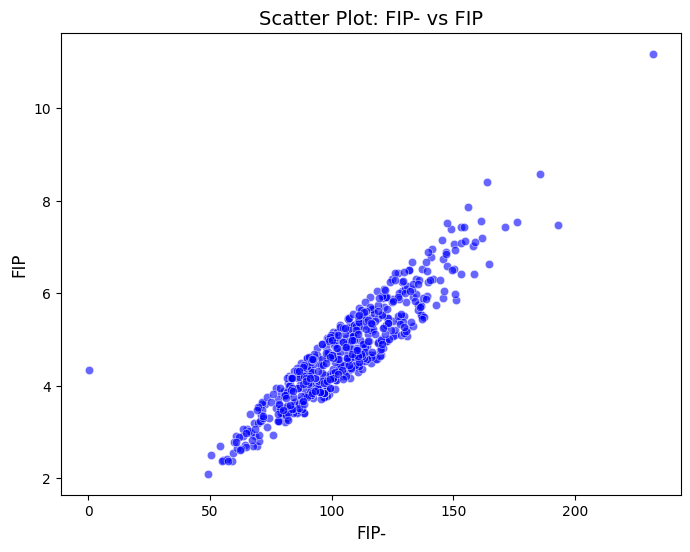


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9241218296630084
P-value: 2.7206401304418254e-230
상관계수는 통계적으로 유의미합니다.


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='FIP-', y='FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr['FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


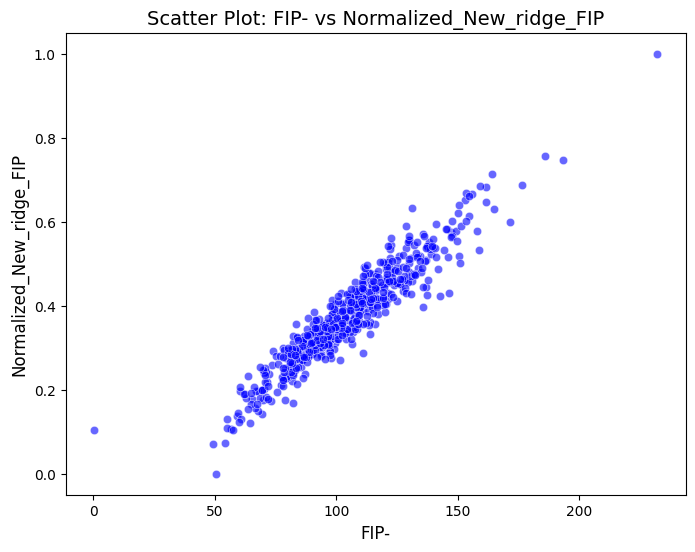


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130540676249
P-value: 3.344496988768714e-267
상관계수는 통계적으로 유의미합니다.


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='FIP-', y='Normalized_New_ridge_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_ridge_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_ridge_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr['Normalized_New_ridge_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [155]:
from sklearn.linear_model import LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 1. 데이터 표준화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# ----------------------------
# 2. Lasso 모델 학습 (표준화 후)
# ----------------------------
alphas = np.logspace(-4, 2, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_std, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f'Lasso Best alpha: {best_alpha_lasso}')

lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_std, y_train)

y_pred_lasso = lasso_best.predict(X_test_std)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso MSE: {mse_lasso}')

lasso_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': lasso_best.coef_
})
print("\n### Lasso 표준화 회귀 계수 ###")
print(lasso_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['lasso_Predicted_FIP'] = lasso_best.predict(X_all_std)
cp_corr['New_Lasso_FIP'] = cp_corr['lasso_Predicted_FIP'] * cp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_Lasso_FIP'] = (
    (cp_corr['New_Lasso_FIP'] - cp_corr['New_Lasso_FIP'].min()) /
    (cp_corr['New_Lasso_FIP'].max() - cp_corr['New_Lasso_FIP'].min())
)

Lasso Best alpha: 0.0001
Lasso MSE: 79.63983294736148

### Lasso 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0     HR/9                 23.902470
1      OBP                 14.217110
4     K/BB                 -1.737651
2       K%                -12.187096
3      SLG                -18.513396


In [156]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(cp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'lasso_Predicted_FIP', 'Normalized_New_Lasso_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  lasso_Predicted_FIP  \
5     정해영    KIA      22  3.44   85.51            80.803244   
6     이준영    KIA      22  3.89   96.72            94.323324   
7     전상현    KIA      22  2.37   58.98            57.791766   
8     장현식    KIA      22  4.21  104.49            97.246863   
10    고영창    KIA      22  5.52  137.03           130.459448   
...   ...    ...     ...   ...     ...                  ...   
1447  김동혁  Kiwom      21  5.24  121.03           121.784349   
1455   양현  Kiwom      21  4.98  114.98           118.652623   
1458  김성진  Kiwom      21  4.69  108.21           100.520553   
1463  김선기  Kiwom      21  5.56  128.50           124.346491   
1464  이승호  Kiwom      21  4.78  110.45           115.258960   

      Normalized_New_Lasso_FIP  
5                     0.254980  
6                     0.324295  
7                     0.137005  
8                     0.339283  
10                    0.509557  
...                      

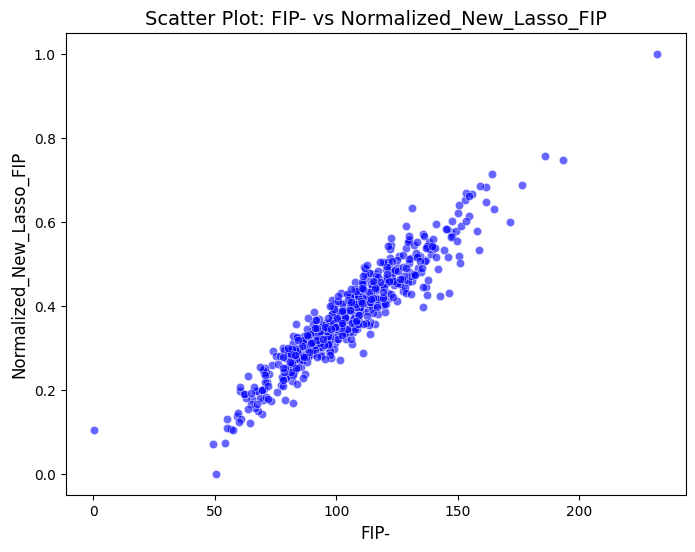


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130641698539
P-value: 3.344333953840772e-267
상관계수는 통계적으로 유의미합니다.


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='FIP-', y='Normalized_New_Lasso_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_Lasso_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_Lasso_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr['Normalized_New_Lasso_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [158]:
l1_ratios = np.linspace(0.1, 1, 10)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv.fit(X_train_std, y_train)

best_alpha_elastic = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print(f'ElasticNet Best alpha: {best_alpha_elastic}')
print(f'ElasticNet Best l1_ratio: {best_l1_ratio}')

elastic_best = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_l1_ratio)
elastic_best.fit(X_train_std, y_train)

y_pred_elastic = elastic_best.predict(X_test_std)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f'ElasticNet MSE: {mse_elastic}')

elastic_coef_std = pd.DataFrame({
    'Variable': X_train.columns,
    'Standardized Coefficient': elastic_best.coef_
})
print("\n### ElasticNet 표준화 회귀 계수 ###")
print(elastic_coef_std.sort_values(by='Standardized Coefficient', ascending=False))

# 7. 전체 데이터에 대한 예측
X_all_std = scaler.transform(X)  # 전체 X도 같은 방식으로 정규화 필요
cp_corr['Predicted_Elastic_FIP'] = elastic_best.predict(X_all_std)
cp_corr['New_Elastic_FIP'] = cp_corr['Predicted_Elastic_FIP'] * cp_corr['inver_PF']

# 8. 정규화된 ERA 지표 생성 (0~1 사이로 변환)
cp_corr['Normalized_New_Elastic_FIP'] = (
    (cp_corr['New_Elastic_FIP'] - cp_corr['New_Elastic_FIP'].min()) /
    (cp_corr['New_Elastic_FIP'].max() - cp_corr['New_Elastic_FIP'].min())
)

ElasticNet Best alpha: 0.0001
ElasticNet Best l1_ratio: 1.0
ElasticNet MSE: 79.63983294736148

### ElasticNet 표준화 회귀 계수 ###
  Variable  Standardized Coefficient
0     HR/9                 23.902470
1      OBP                 14.217110
4     K/BB                 -1.737651
2       K%                -12.187096
3      SLG                -18.513396


In [159]:
# 결과 확인
print("\n### 선수별 예측 FIP ###")
print(cp_corr[['Name', 'Team', 'Season', 'FIP',  'FIP-', 'Predicted_Elastic_FIP', 'Normalized_New_Elastic_FIP']])  # 예시 출력


### 선수별 예측 FIP ###
     Name   Team  Season   FIP    FIP-  Predicted_Elastic_FIP  \
5     정해영    KIA      22  3.44   85.51              80.803244   
6     이준영    KIA      22  3.89   96.72              94.323324   
7     전상현    KIA      22  2.37   58.98              57.791766   
8     장현식    KIA      22  4.21  104.49              97.246863   
10    고영창    KIA      22  5.52  137.03             130.459448   
...   ...    ...     ...   ...     ...                    ...   
1447  김동혁  Kiwom      21  5.24  121.03             121.784349   
1455   양현  Kiwom      21  4.98  114.98             118.652623   
1458  김성진  Kiwom      21  4.69  108.21             100.520553   
1463  김선기  Kiwom      21  5.56  128.50             124.346491   
1464  이승호  Kiwom      21  4.78  110.45             115.258960   

      Normalized_New_Elastic_FIP  
5                       0.254980  
6                       0.324295  
7                       0.137005  
8                       0.339283  
10                      

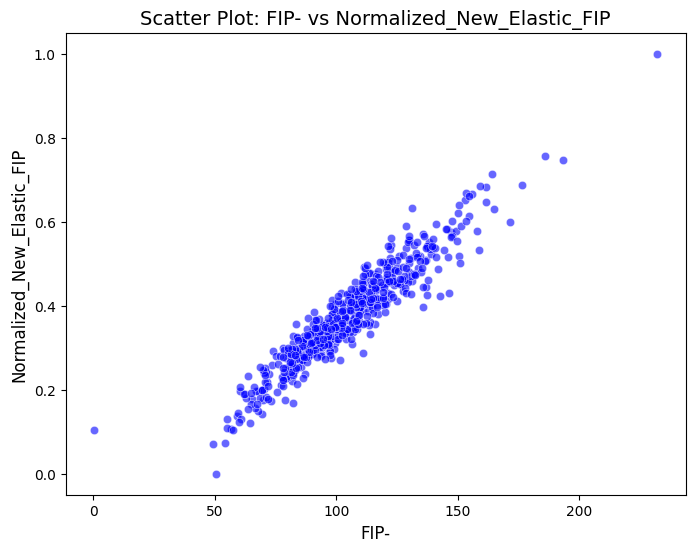


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130641698539
P-value: 3.344333953840772e-267
상관계수는 통계적으로 유의미합니다.


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cp_corr, x='FIP-', y='Normalized_New_Elastic_FIP', color='blue', alpha=0.6)
plt.title('Scatter Plot: FIP- vs Normalized_New_Elastic_FIP', fontsize=14)
plt.xlabel('FIP-', fontsize=12)
plt.ylabel('Normalized_New_Elastic_FIP', fontsize=12)
plt.show()

# 상관계수 및 유의계수 계산
corr, p_value = pearsonr(cp_corr['FIP-'], cp_corr['Normalized_New_Elastic_FIP'])

# 결과 출력
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# 상관계수의 의미
if p_value < 0.05:
    print("상관계수는 통계적으로 유의미합니다.")
else:
    print("상관계수는 통계적으로 유의미하지 않습니다.")


In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['HR/9', 'OBP', 'K%', 'SLG', 'K/BB']]
y = cp_corr['FIP-']  # 종속 변수

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 5. XGBoost 하이퍼파라미터 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 500],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'alpha': [0, 1, 10, 100]
}
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],  # 학습률
#     'max_depth': [7,8,10],  # 트리의 최대 깊이
#     'n_estimators': [800, 1000, 1200],  # 부스팅 반복 횟수
#     'colsample_bytree': [0.5, 1, 2],  # 트리 생성 시 열 샘플링 비율
#     'alpha': [0, 0.1, 0.5],  # L1 정규화 파라미터
#     'subsample': [0.5,0.8,1],  # 각 부스팅 반복 시 사용되는 데이터 샘플링 비율
#     'lambda': [0, 0.1, 1],  # L2 정규화 파라미터
#     'scale_pos_weight': [0.05, 0.1, 0.3]  # 불균형 데이터셋에서 양성 클래스에 대한 가중치 조정
# }
# 6. XGBoost 모델 및 GridSearchCV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 7. 최적 모델 추출 및 예측
best_xg_reg = grid_search.best_estimator_
y_pred_xg = best_xg_reg.predict(X_test_scaled)
mse_xg = mean_squared_error(y_test, y_pred_xg)
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best XGBoost MSE: {mse_xg:.4f}")

# 8. 전체 데이터에 대한 예측 및 PF 반영
cp_corr['Predicted_FIP_XGBoost'] = best_xg_reg.predict(X_scaled_all)
cp_corr['New_xgboost_FIP'] = cp_corr['Predicted_FIP_XGBoost'] * cp_corr['PF_inverse']

# 9. 결과 출력
print("\n### 최적 XGBoost 예측 ERA ###")
print(cp_corr[['Name', 'FIP-', 'Predicted_FIP_XGBoost', 'New_xgboost_FIP']])

cp_corr['Normalized_New_xgboost_FIP'] = (
    (cp_corr['New_xgboost_FIP'] - cp_corr['New_xgboost_FIP'].min()) /
    (cp_corr['New_xgboost_FIP'].max() - cp_corr['New_xgboost_FIP'].min())
)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best Hyperparameters: {'alpha': 1, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost MSE: 64.0422

### 최적 XGBoost 예측 ERA ###
     Name    FIP-  Predicted_FIP_XGBoost  New_xgboost_FIP
5     정해영   85.51              86.983902        87.114574
6     이준영   96.72              96.166939        96.311406
7     전상현   58.98              61.477020        61.569374
8     장현식  104.49             106.930962       107.091599
10    고영창  137.03             128.724228       128.917604
...   ...     ...                    ...              ...
1447  김동혁  121.03             116.158829       118.251887
1455   양현  114.98             120.892151       123.070499
1458  김성진  108.21             112.550735       114.578780
1463  김선기  128.50             123.634537       125.862299
1464  이승호  110.45             115.192970       117.268625

[548 rows x 4 columns]


In [162]:
print("\n### 정규화된 XGBoost ERA ###")
print(cp_corr[['Name', 'FIP-', 'Predicted_FIP_XGBoost', 'New_xgboost_FIP', 'Normalized_New_xgboost_FIP']])


### 정규화된 XGBoost ERA ###
     Name    FIP-  Predicted_FIP_XGBoost  New_xgboost_FIP  \
5     정해영   85.51              86.983902        87.114574   
6     이준영   96.72              96.166939        96.311406   
7     전상현   58.98              61.477020        61.569374   
8     장현식  104.49             106.930962       107.091599   
10    고영창  137.03             128.724228       128.917604   
...   ...     ...                    ...              ...   
1447  김동혁  121.03             116.158829       118.251887   
1455   양현  114.98             120.892151       123.070499   
1458  김성진  108.21             112.550735       114.578780   
1463  김선기  128.50             123.634537       125.862299   
1464  이승호  110.45             115.192970       117.268625   

      Normalized_New_xgboost_FIP  
5                       0.362802  
6                       0.404886  
7                       0.245910  
8                       0.454215  
10                      0.554089  
...                          ..

In [163]:
ser = pd.Series(best_xg_reg.feature_importances_, index = X.columns)

top3 = ser.sort_values(ascending = False)[:5]
print(top3)

K/BB    0.578746
HR/9    0.235487
K%      0.136111
SLG     0.029882
OBP     0.019775
dtype: float32


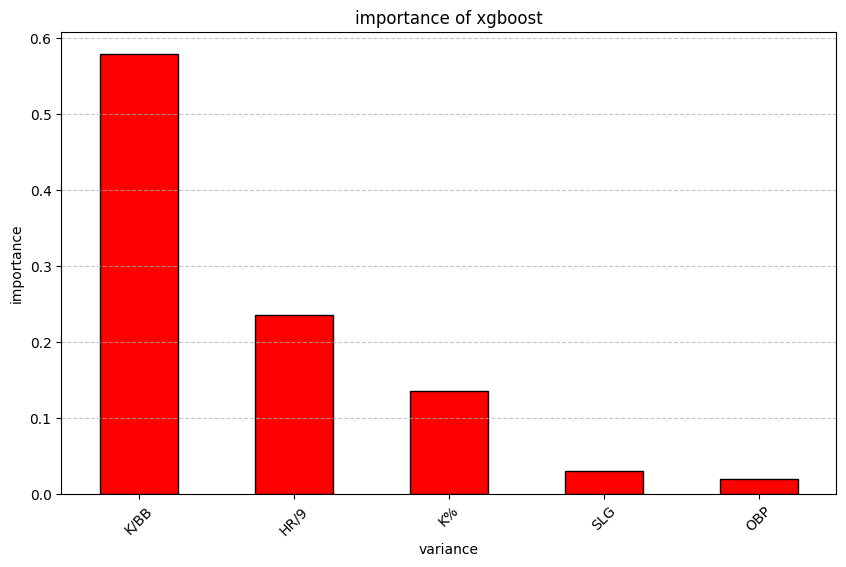

In [164]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'red', edgecolor = 'black')

plt.title('importance of xgboost')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

In [301]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.60.0-cp39-cp39-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/544.8 kB ? eta -:--:--
   --------------------------------------- 544.8/544.8 kB 18.8 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.60.0-cp39-cp39-win_amd64.whl (2.7 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.43.0-cp39-cp39-win_amd64.whl (28.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.7 requires chardet==4.0.0, which is not installed.
roboflow 1.1.7 requires opencv-python-headless==4.8.0.74, which is not installed.
spacy 3.7.2 requires smart-open<7.0.0,>=5.2.1, which is not installed.
torchtext 0.6.0 requires torch, which is not installed.
roboflow 1.1.7 requires certifi==2022.12.7, but you have certifi 2025.1.31 which is incompatible.
roboflow 1.1.7 requires cycler==0.10.0, but you have cycler 0.12.1 which is incompatible.
roboflow 1.1.7 requires idna==2.10, but you have idna 3.10 which is incompatible.
roboflow 1.1.7 requires pyparsing==2.4.7, but you have pyparsing 3.2.3 which is incompatible.


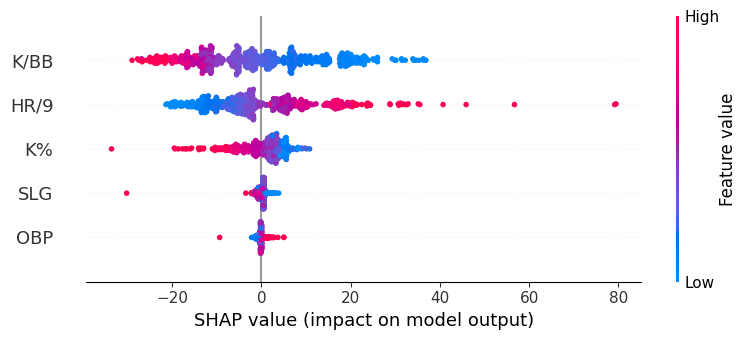

In [165]:
import shap

# TreeExplainer로 XGBoost 모델 해석
explainer = shap.Explainer(best_xg_reg)
shap_values = explainer(X_scaled_all)

# 전체 변수 영향력 요약 + 방향성
shap.summary_plot(shap_values, X, feature_names=X.columns)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math


# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['HR/9', 'OBP', 'K%', 'SLG', 'K/BB']]
y = cp_corr['FIP-'] 

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# params = {
#     'n_estimators': (100, 250, 500, 750, 1000),
#     'max_depth': (3, 6, 9, 12, 15),
#     'min_samples_leaf': (5, 10, 15, 20, 25),
#     'min_samples_split': (5, 10, 15, 20, 25)
# }
params = {
    'n_estimators' : (100, 200, 500),
    'max_depth' : (5,8,10),
    'min_samples_leaf' : (8,18,25),
    'min_samples_split' : (8,16,25)
}

# RandomForest 모델 학습
rf_reg = RandomForestRegressor(random_state = 42, n_jobs = -1)
rf_reg_cv = GridSearchCV(rf_reg, param_grid = params, cv = 2, n_jobs = -1)
rf_reg_cv.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_reg_cv.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForest MSE: {mse_rf}')

# 예측값 생성 (전체 데이터에 대해 예측)
cp_corr['Predicted_FIP_RF'] = rf_reg_cv.predict(X)
cp_corr['New_randomforest_FIP'] = cp_corr['Predicted_FIP_RF'] * cp_corr['PF_inverse']

# 결과 확인
print("\n### RandomForest 예측 FIP ###")
print(cp_corr[['Name', 'FIP-', 'Predicted_FIP_RF', 'New_randomforest_FIP']])

cp_corr['Normalized_New_randomforest_FIP'] = (
    (cp_corr['New_randomforest_FIP'] - cp_corr['New_randomforest_FIP'].min()) /
    (cp_corr['New_randomforest_FIP'].max() - cp_corr['New_randomforest_FIP'].min())
)

RandomForest MSE: 71.56366649427376

### RandomForest 예측 FIP ###
     Name    FIP-  Predicted_FIP_RF  New_randomforest_FIP
5     정해영   85.51         87.663265             87.794957
6     이준영   96.72         96.942793             97.088426
7     전상현   58.98         62.936834             63.031381
8     장현식  104.49        105.155873            105.313844
10    고영창  137.03        126.850595            127.041157
...   ...     ...               ...                   ...
1447  김동혁  121.03        122.774917            124.987190
1455   양현  114.98        123.692753            125.921564
1458  김성진  108.21        112.052305            114.071368
1463  김선기  128.50        121.698864            123.891748
1464  이승호  110.45        114.533308            116.597076

[548 rows x 4 columns]


In [101]:
print("\n### 정규화된 RandomForest FIP ###")
print(cp_corr[['Name', 'FIP-', 'Predicted_FIP_RF', 'New_randomforest_FIP', 'Normalized_New_randomforest_FIP']])


### 정규화된 RandomForest FIP ###
     Name    FIP-  Predicted_FIP_RF  New_randomforest_FIP  \
5     정해영   85.51         87.663265             87.794957   
6     이준영   96.72         96.942793             97.088426   
7     전상현   58.98         62.936834             63.031381   
8     장현식  104.49        105.155873            105.313844   
10    고영창  137.03        126.850595            127.041157   
...   ...     ...               ...                   ...   
1447  김동혁  121.03        122.774917            124.987190   
1455   양현  114.98        123.692753            125.921564   
1458  김성진  108.21        112.052305            114.071368   
1463  김선기  128.50        121.698864            123.891748   
1464  이승호  110.45        114.533308            116.597076   

      Normalized_New_randomforest_FIP  
5                            0.252923  
6                            0.332907  
7                            0.039796  
8                            0.403699  
10                           0.59069

In [102]:
best_rf = rf_reg_cv.best_estimator_
print(best_rf.feature_importances_, '\n')
ser = pd.Series(best_rf.feature_importances_, index = X_train.columns)

top3 = ser.sort_values(ascending = False)[:5]
print(top3)

[0.31172273 0.00674892 0.09555999 0.0199583  0.56601006] 

K/BB    0.566010
HR/9    0.311723
K%      0.095560
SLG     0.019958
OBP     0.006749
dtype: float64


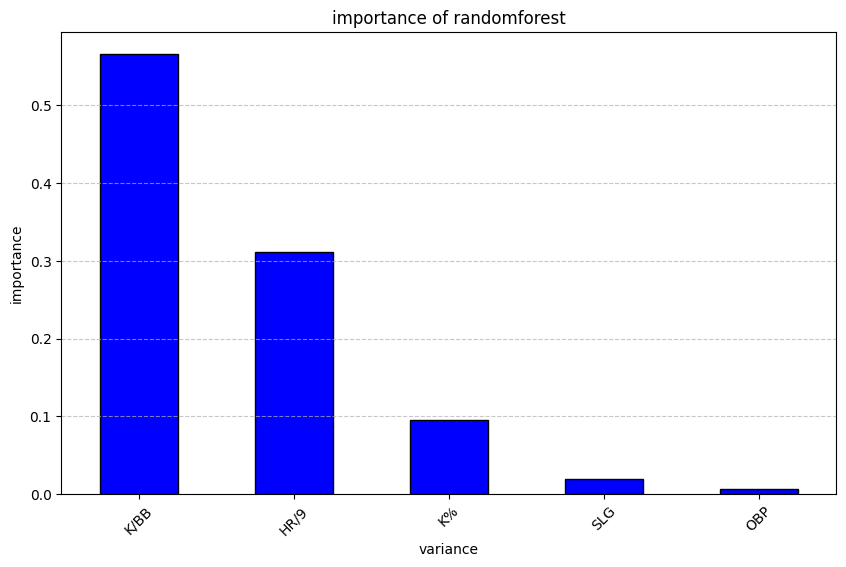

In [103]:
plt.figure(figsize = (10,6))
top3.plot(kind = 'bar', color = 'blue', edgecolor = 'black')

plt.title('importance of randomforest')
plt.xlabel('variance')
plt.ylabel('importance')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

In [104]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

lgb_reg = lgb.LGBMRegressor()

# 1. 파생 변수 생성
cp_corr['PF_inverse'] = 1 / cp_corr['PPF']

# 2. 독립 변수 및 종속 변수 정의
X = cp_corr[['HR/9', 'OBP', 'K%', 'SLG', 'K/BB']]
y = cp_corr['FIP-']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled_all = scaler.transform(X)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [20, 31, 40],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000]
}

# GridSearchCV를 사용한 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(lgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델 가져오기
best_lgb = grid_search.best_estimator_

# 예측 및 평가
y_pred_lgb = best_lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)

# 결과 출력
print(f'Best Parameters: {grid_search.best_params_}')
print(f'LightGBM MSE: {mse_lgb}')

# Feature Importance 확인
feature_importance = pd.Series(best_lgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# 상위 10개 변수 출력
print("\n### Top 5 Feature Importance ###")
print(feature_importance[:5])

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 536
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 5
[LightGBM] [Info] Start training from score 105.848390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [105]:
cp_corr['Predicted_FIP_gbm'] = best_lgb.predict(X)
cp_corr['New_lightgbm_FIP'] = cp_corr['Predicted_FIP_gbm'] * cp_corr['PF_inverse']

cp_corr['Normalized_New_LightGBM_FIP'] = (
    (cp_corr['New_lightgbm_FIP'] - cp_corr['New_lightgbm_FIP'].min()) /
    (cp_corr['New_lightgbm_FIP'].max() - cp_corr['New_lightgbm_FIP'].min())
)


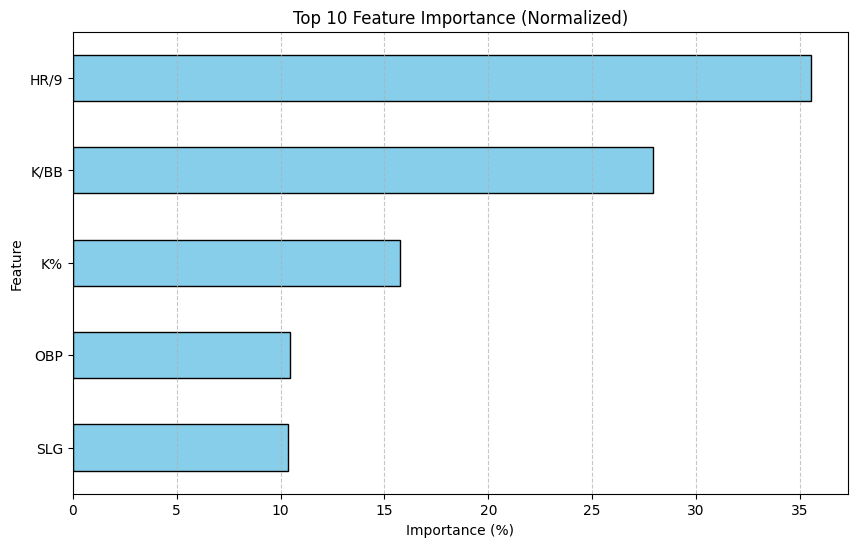

In [106]:
import matplotlib.pyplot as plt

# Feature Importance 비율화 (백분율)
feature_importance_ratio = feature_importance / feature_importance.sum() * 100

# 상위 10개 변수 선택
top_10_features = feature_importance_ratio[:10]

# 시각화
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance (Normalized)")
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 정렬
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [107]:
print("\n### LightGBM 예측 FIP ###")
print(cp_corr[['Name', 'FIP-', 'Predicted_FIP_gbm', 'New_lightgbm_FIP', 'Normalized_New_LightGBM_FIP']])


### LightGBM 예측 FIP ###
     Name    FIP-  Predicted_FIP_gbm  New_lightgbm_FIP  \
5     정해영   85.51          87.220901         87.351929   
6     이준영   96.72          96.557274         96.702328   
7     전상현   58.98          59.277266         59.366315   
8     장현식  104.49         105.772137        105.931033   
10    고영창  137.03         130.779411        130.975875   
...   ...     ...                ...               ...   
1447  김동혁  121.03         126.311392        128.587389   
1455   양현  114.98         128.443781        130.758201   
1458  김성진  108.21         111.710081        113.722978   
1463  김선기  128.50         122.837318        125.050716   
1464  이승호  110.45         116.017476        118.107987   

      Normalized_New_LightGBM_FIP  
5                        0.254217  
6                        0.328335  
7                        0.032384  
8                        0.401488  
10                       0.600010  
...                           ...  
1447                     0

In [166]:
cp_corr.to_csv("Predict_relief_PPF_newsample_fipplus5.csv", index = False, encoding = "utf-8-sig")
print("done")

done


In [167]:
#another_cp_corr = cp_corr[['FIP-', 'FIP', 'Normalized_New_ridge_FIP', 'Normalized_New_Lasso_FIP', 'Normalized_New_Elastic_FIP', 'Normalized_New_xgboost_FIP','Normalized_New_randomforest_FIP', 'Normalized_New_LightGBM_FIP']]
another_cp_corr = cp_corr[['FIP-', 'FIP', 'Normalized_New_ridge_FIP', 'Normalized_New_Lasso_FIP', 'Normalized_New_Elastic_FIP', 'Normalized_New_xgboost_FIP']]
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(another_cp_corr)

# 표준화된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=another_cp_corr.columns)

In [168]:
corr, p_value = pearsonr(scaled_df['FIP'], scaled_df['FIP-'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP'], scaled_df['FIP-']))
print(f"RMSE: {rmse}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9241218296630088
P-value: 2.7206401304377856e-230
RMSE: 0.38955916196899176


In [169]:
# R² 계산
r2 = r2_score(scaled_df['FIP'], scaled_df['FIP-'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 결정계수 (R²) ###
R² Score: 0.8482436593260168


In [170]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_ridge_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130540676251
P-value: 3.344496988765101e-267
RMSE: 0.33162311720498355

### 결정계수 (R²) ###
R² Score: 0.8900261081352497


In [171]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_Lasso_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130641698539
P-value: 3.344333953840772e-267
RMSE: 0.3316230867420004

### 결정계수 (R²) ###
R² Score: 0.8900261283397077


In [172]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_Elastic_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9450130641698539
P-value: 3.344333953840772e-267
RMSE: 0.3316230867420004

### 결정계수 (R²) ###
R² Score: 0.8900261283397077


In [173]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_xgboost_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9715433107625133
P-value: 0.0
RMSE: 0.23856524993169823

### 결정계수 (R²) ###
R² Score: 0.9430866215250263


In [116]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_randomforest_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9400013468017527
P-value: 3.6517130837466186e-257
RMSE: 0.3464062736101854

### 결정계수 (R²) ###
R² Score: 0.8800026936035054


In [117]:
corr, p_value = pearsonr(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP'])
print(f"\n### 상관계수 및 유의계수 ###")
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

rmse = np.sqrt(mean_squared_error(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP']))
print(f"RMSE: {rmse}")

# R² 계산
r2 = r2_score(scaled_df['FIP-'], scaled_df['Normalized_New_LightGBM_FIP'])

print(f"\n### 결정계수 (R²) ###")
print(f"R² Score: {r2}")


### 상관계수 및 유의계수 ###
Pearson Correlation Coefficient: 0.9541919031989977
P-value: 2.658969162250794e-288
RMSE: 0.3026816704096969

### 결정계수 (R²) ###
R² Score: 0.9083838063979957
